In [9]:
from adaptive_CI.saving import *
from adaptive_CI.compute import collect

import matplotlib.pyplot as plt 
from matplotlib.lines import Line2D

import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as stats

import copy
import  pickle
import warnings


from scipy.stats import norm
from pickle import UnpicklingError
from IPython.display import display, HTML
from time import time
from glob import glob
from os.path import join
from itertools import compress

sns.set_context("notebook", font_scale=1.4)
pd.options.mode.chained_assignment = None 

%matplotlib inline
%reload_ext autoreload
%autoreload 2

----

### Load data

In [2]:
data_contrast = pd.read_pickle('results/contrast_results.pkl')

In [5]:
data_arms = pd.read_pickle('results/arm_results.pkl')

In [ ]:
data_hist = pd.read_pickle('results/tstat_results.pkl')

----

# Evolution of contrast estimates

In [18]:
Ts = [1_000, 5_000, 10_000, 50_000, 100_000]
policies = ['(0,2)']
row_order=['nosignal', 'lowSNR', 'highSNR']
col_order=['mse', 'bias', 'CI_width', '90% coverage of t-stat']
col_names=['RMSE', 'Bias', 'Confidence Interval Radius', '90% coverage']
labels=['Uniform', 'Constant allocation rate', 'Two-point allocation rate', 'Sample mean (normal CI)', 'Sample mean (Howard et al CI)']
hue_order=['uniform', 'lvdl', 'two_point',  'sample_mean_naive', 'gamma_exponential']

sns_palette = sns.color_palette('colorblind')
palette = [sns_palette[0], sns_palette[1], sns_palette[2], sns_palette[3], sns_palette[3]]

subsetting
plotting


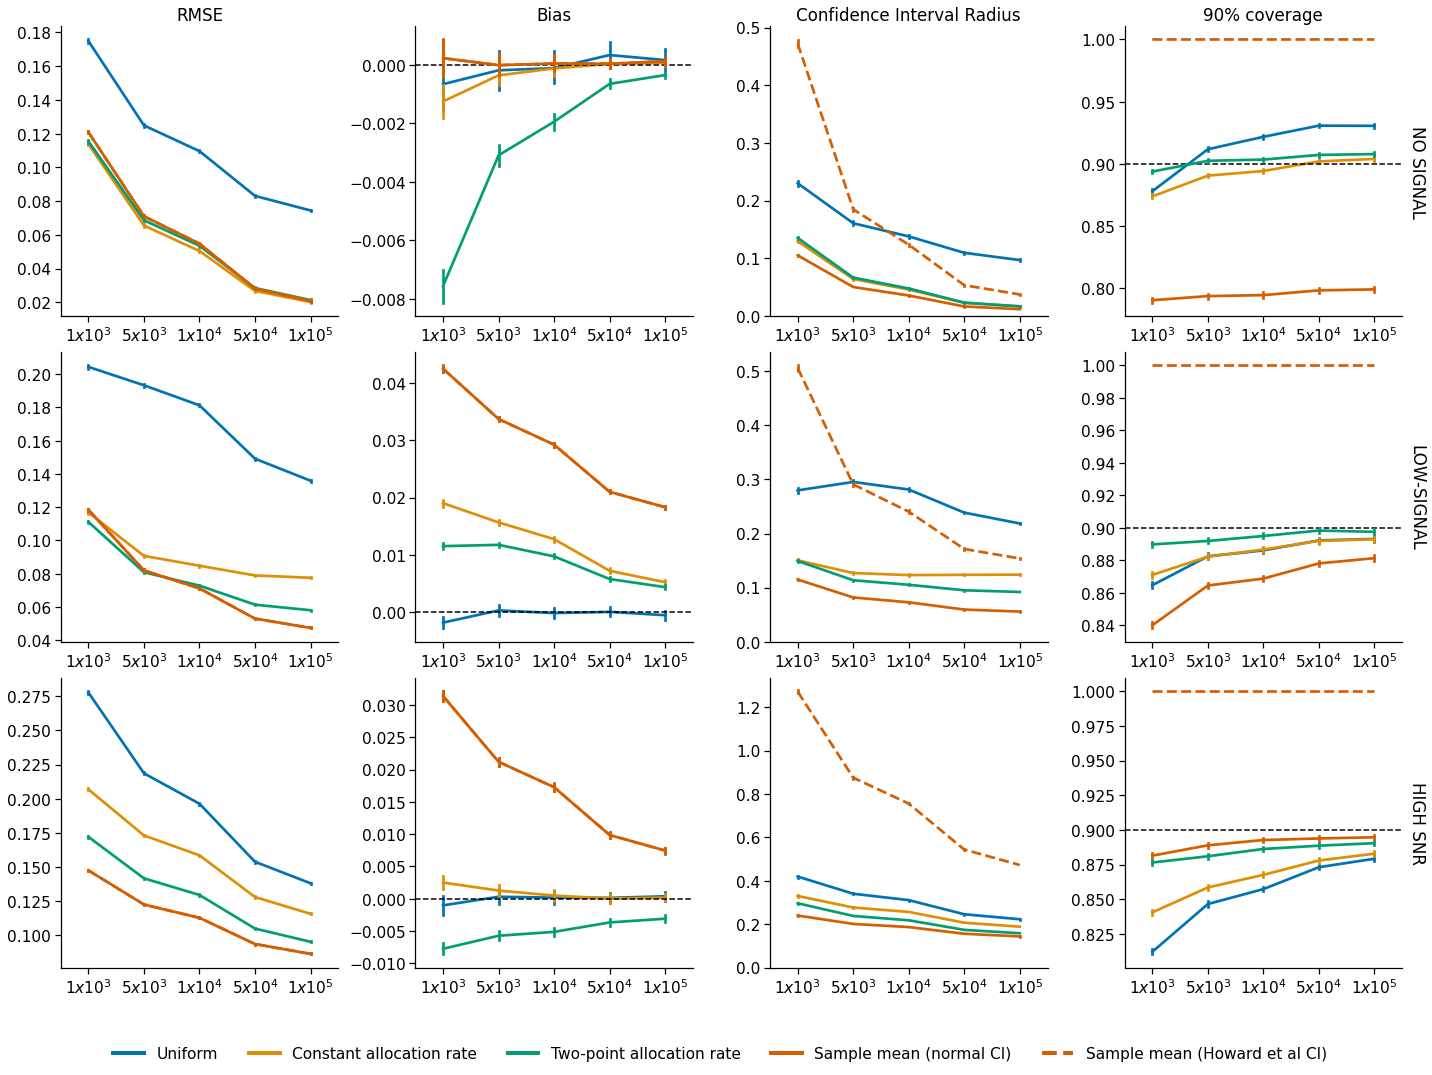

In [23]:


display(HTML(f"<h2>Policy: Contrast</h2>"))

g = sns.catplot(x="T",
                y="value",
                col="statistic",
                col_order=col_order,
                row="dgp",
                row_order=row_order,
                hue='method',
                hue_order=hue_order,
                palette=palette,
                kind="point",
                sharex=False,
                sharey=False,
                legend=False,
                legend_out=True,
                margin_titles=True,
                markers="",
                data=data_contrast)

# Plot ROOT mse
for i, dgp in enumerate(row_order): 
    g.axes[i, 0].clear()
    sns.pointplot(x='T',
                  y="value",
                  hue='method',
                  hue_order=hue_order,
                  palette=palette,
                  ax=g.axes[i, 0],
                  data=data_contrast.query(f"statistic=='mse' & dgp=='{dgp}'"),
                  estimator=lambda x: np.sqrt(np.mean(x)),
                  markers="")
    g.axes[i, 0].get_legend().remove()
g.axes[0, 0].set_xlabel("")
g.axes[0, 0].set_ylabel("")

for ax in g.axes.flat:
    numbers = ["{:e}".format(t, 2).split("e") for t in Ts]
    xticklabels = [f"${int(float(base))}x10^{int(mant)}$" for base, mant in numbers]
    ax.set_xticklabels(xticklabels)

# Add row and column names
g.row_names = ['NO SIGNAL', 'LOW-SIGNAL', 'HIGH SNR']
g.col_names = col_names

for ax in g.axes.flat:
    plt.setp(ax.texts, text="")
g.set_titles(row_template="{row_name}", col_template="{col_name}")

for ax in g.axes[:, 1]:
    ax.axhline(0, color="black", linestyle='--')

# CI radius
for ax in g.axes[:, 2]:
    ax.set_ylim((0, ax.get_ylim()[1]))

for ax in g.axes[:, -1]:
    ax.axhline(0.90, color="black", linestyle='--')

g.fig.tight_layout()

for ax in g.axes.flat:
    ax.lines[24].set_linestyle('--')

 # Add legend
new_handles = [Line2D([0], [0], color=pal, linewidth=4, linestyle="--" if k == 4 else "-") for k, pal in enumerate(palette)]
label_dict = dict(zip(hue_order, labels))
g.fig.legend(labels=labels, frameon=False,
             handles=new_handles, loc='lower center',
             ncol=len(labels), bbox_to_anchor=(0.5, 0.0))

g.set_xlabels("")
g.set_ylabels("")
g.fig.tight_layout()

g.fig.subplots_adjust(bottom=0.1)

if isinstance(policy, int):
    name=f"evolution_{policy}"
else:
    name=f"evolution_{policy[1]}-{policy[3]}"
g.fig.savefig(f'figures/{name}.pdf', bbox_inches='tight')

plt.show()

----

# Evolution of arm values

In [5]:
Ts = [1_000, 5_000, 10_000, 50_000, 100_000]
policies = [0, 1, 2]
row_order=['nosignal', 'lowSNR', 'highSNR']
col_order=['mse', 'bias', 'CI_width', '90% coverage of t-stat']
col_names=['RMSE', 'Bias', 'Confidence Interval Radius', '90% coverage']
labels=['Uniform', 'Constant allocation rate', 'Two-point allocation rate', 'Sample mean (normal CI)', 'Sample mean (Howard et al CI)']
hue_order=['uniform', 'lvdl', 'two_point',  'sample_mean_naive', 'gamma_exponential']

sns_palette = sns.color_palette('colorblind')
palette = [sns_palette[0], sns_palette[1], sns_palette[2], sns_palette[3], sns_palette[3]]

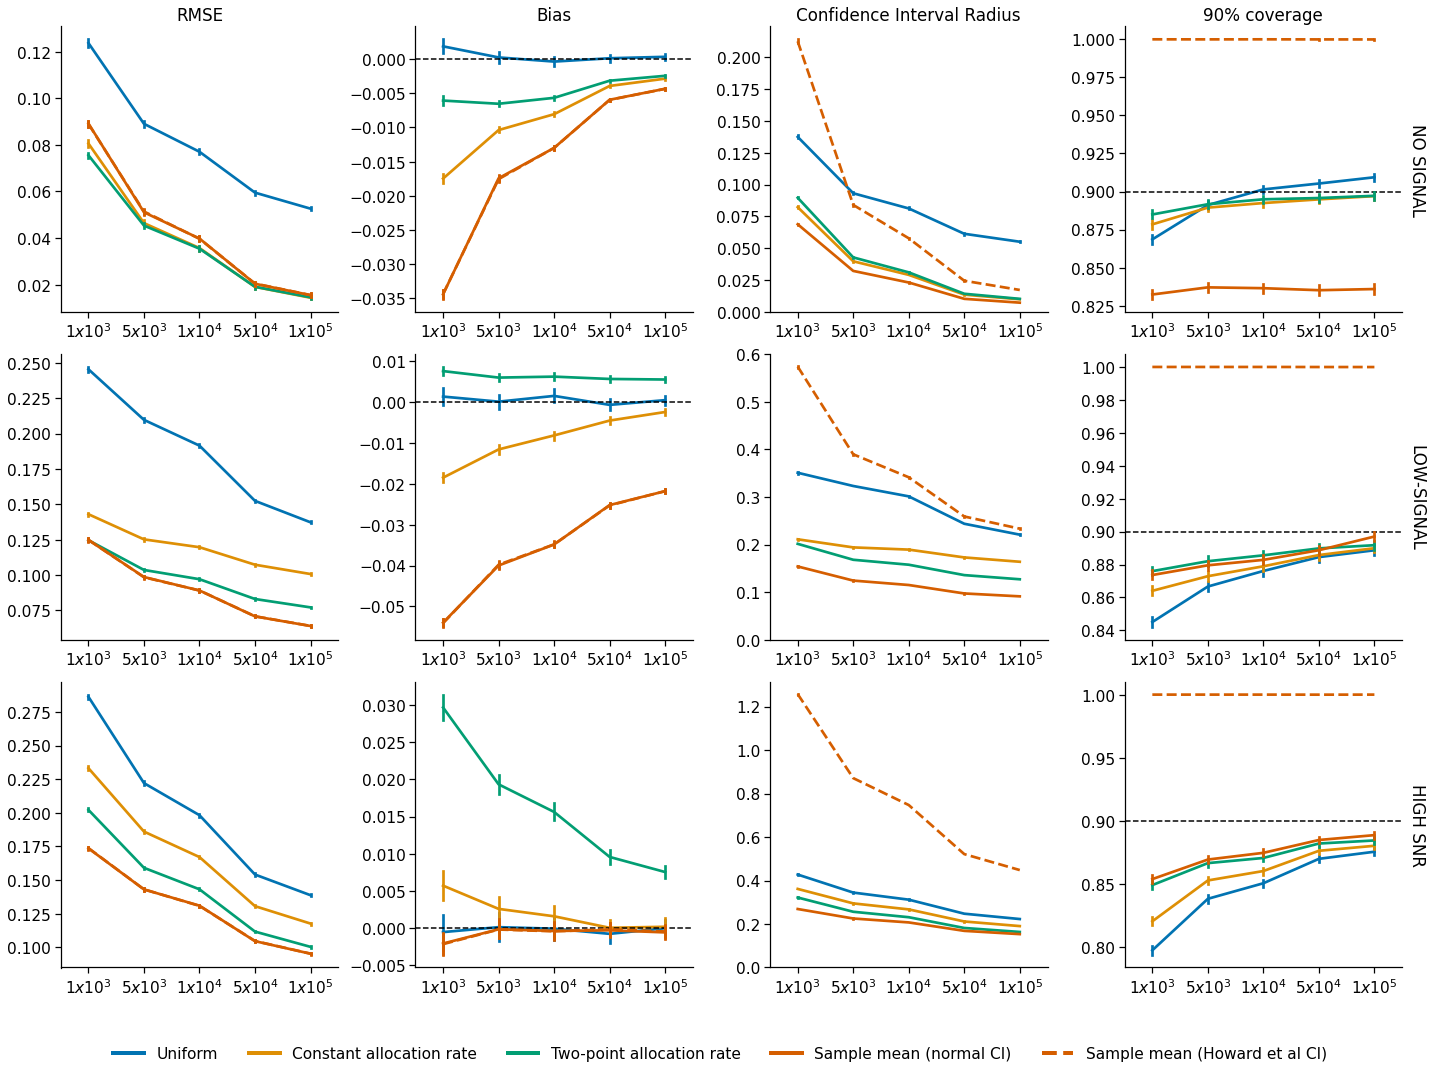

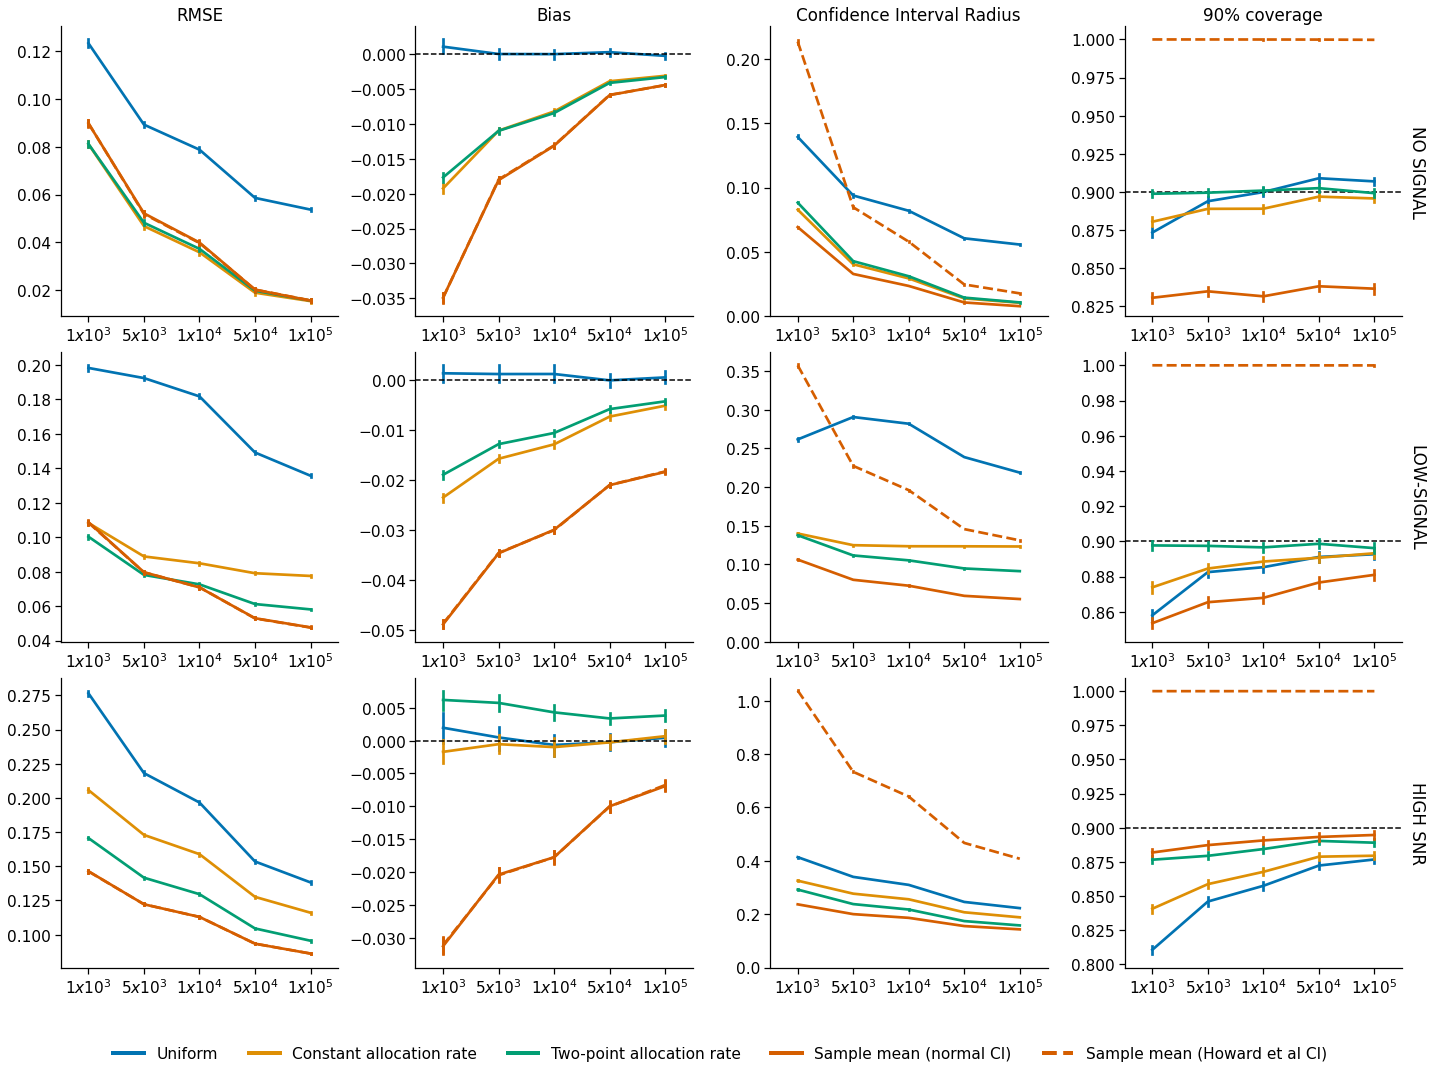

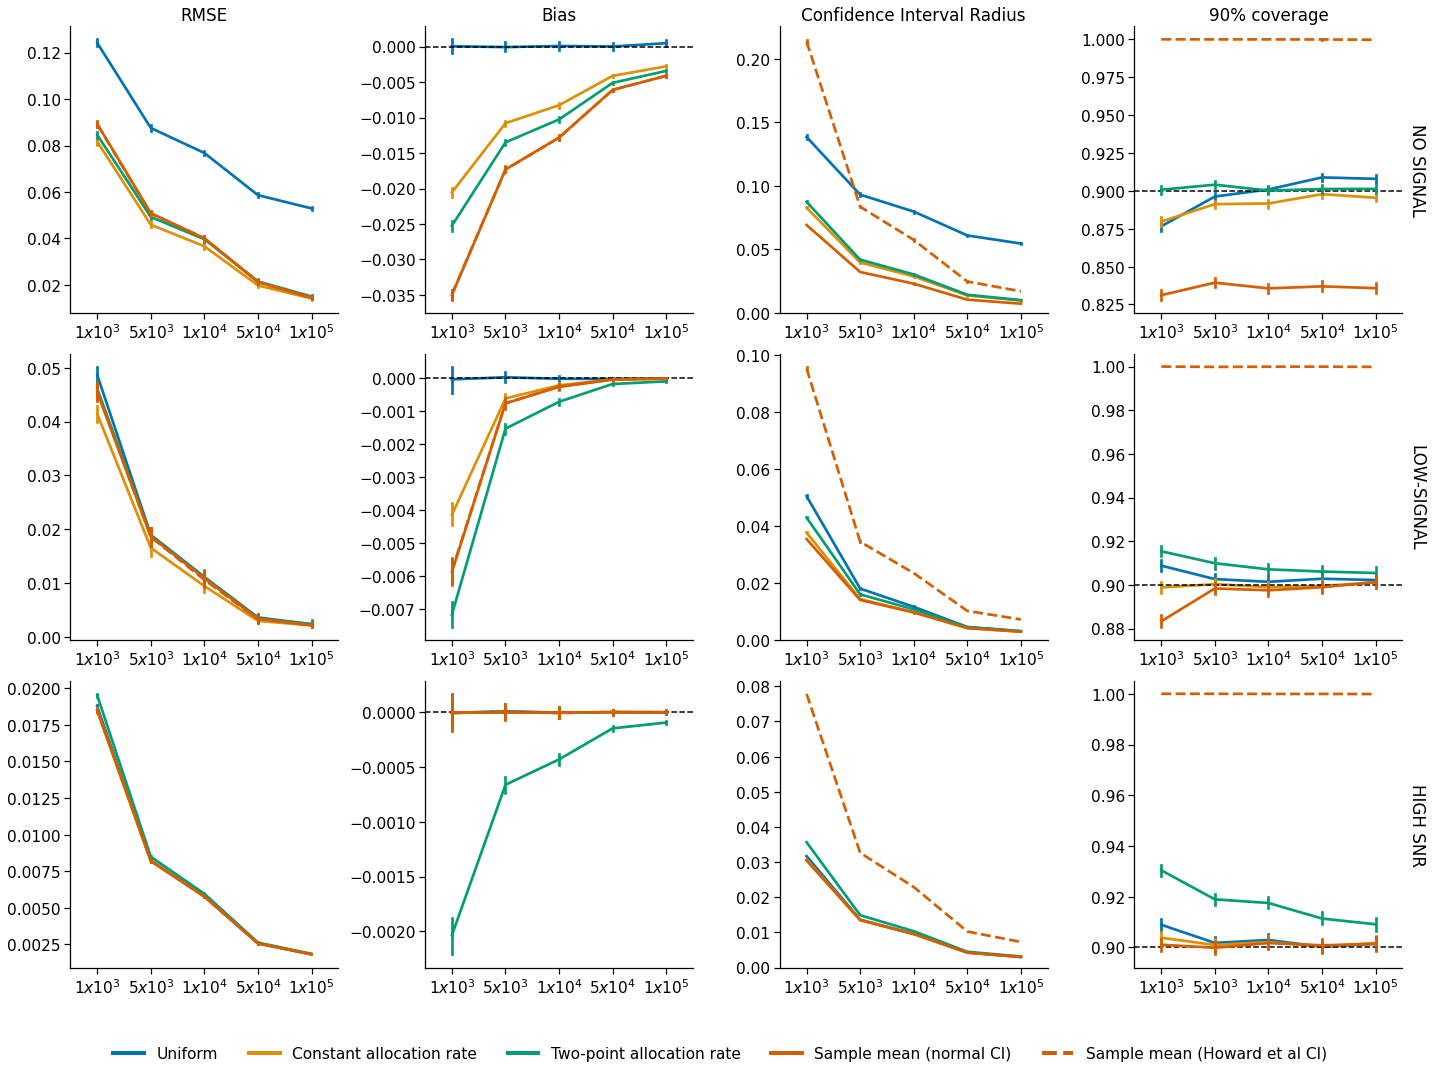

In [6]:
for policy in policies:

    data_arm = data_arms.query('policy == @policy')
    
    display(HTML(f"<h2>Policy: {policy}</h2>"))

    g = sns.catplot(x="T",
                    y="value",
                    col="statistic",
                    col_order=col_order,
                    row="dgp",
                    row_order=row_order,
                    hue='method',
                    hue_order=hue_order,
                    palette=palette,
                    kind="point",
                    sharex=False,
                    sharey=False,
                    legend=False,
                    legend_out=True,
                    margin_titles=True,
                    markers="",
                    data=data_arm)

    # Plot ROOT mse
    for i, dgp in enumerate(row_order): 
        g.axes[i, 0].clear()
        sns.pointplot(x='T',
                      y="value",
                      hue='method',
                      hue_order=hue_order,
                      palette=palette,
                      ax=g.axes[i, 0],
                      data=data_arm.query(f"statistic=='mse' & dgp=='{dgp}'"),
                      estimator=lambda x: np.sqrt(np.mean(x)),
                      markers="")
        g.axes[i, 0].get_legend().remove()
    g.axes[0, 0].set_xlabel("")
    g.axes[0, 0].set_ylabel("")

    for ax in g.axes.flat:
        numbers = ["{:e}".format(t, 2).split("e") for t in Ts]
        xticklabels = [f"${int(float(base))}x10^{int(mant)}$" for base, mant in numbers]
        ax.set_xticklabels(xticklabels)

    # Add row and column names
    g.row_names = ['NO SIGNAL', 'LOW-SIGNAL', 'HIGH SNR']
    g.col_names = col_names

    for ax in g.axes.flat:
        plt.setp(ax.texts, text="")
    g.set_titles(row_template="{row_name}", col_template="{col_name}")

    for ax in g.axes[:, 1]:
        ax.axhline(0, color="black", linestyle='--')

    # CI radius
    for ax in g.axes[:, 2]:
        ax.set_ylim((0, ax.get_ylim()[1]))

    for ax in g.axes[:, -1]:
        ax.axhline(0.90, color="black", linestyle='--')

    g.fig.tight_layout()

    for ax in g.axes.flat:
        ax.lines[24].set_linestyle('--')

     # Add legend
    new_handles = [Line2D([0], [0], color=pal, linewidth=4, linestyle="--" if k == 4 else "-") for k, pal in enumerate(palette)]
    label_dict = dict(zip(hue_order, labels))
    g.fig.legend(labels=labels, frameon=False,
                 handles=new_handles, loc='lower center',
                 ncol=len(labels), bbox_to_anchor=(0.5, 0.0))

    g.set_xlabels("")
    g.set_ylabels("")
    g.fig.tight_layout()

    g.fig.subplots_adjust(bottom=0.1)

    name=f"evolution_{policy}"
    g.fig.savefig(f'figures/{name}.pdf', bbox_inches='tight')

    plt.show()

----

# Arm values at T

In [10]:
col_order=['mse', 'bias', 'CI_width', '90% coverage of t-stat']
row_order=[2, 0]
hue='method'
hue_order=['uniform', 'lvdl', 'two_point',  'sample_mean_naive', 'gamma_exponential']
labels=['Uniform', 'Constant allocation rate', 'Two-point allocation rate', 'Sample mean (normal CI)', 'Sample mean (Howard et al CI)']
noise_func='uniform'
order = ['nosignal', 'lowSNR', f'highSNR']
order_name = ['NO SIGNAL', 'LOW SNR', 'HIGH SNR']

In [11]:
data_arms_T = data_arms.query("T == 100000")

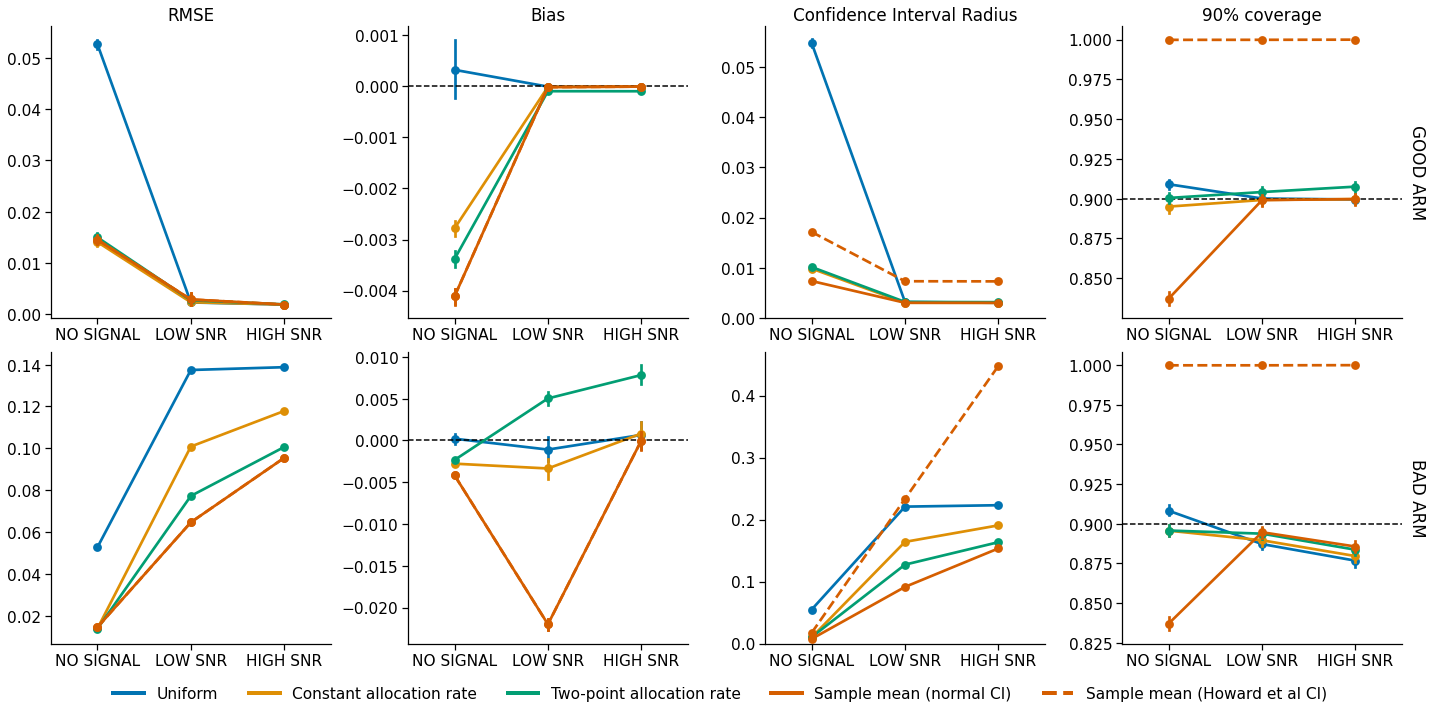

In [12]:
g = sns.catplot(x="dgp",
                y="value",
                order=order,
                hue='method',
                hue_order=hue_order,
                palette=palette,
                col="statistic",
                col_order=col_order,
                row="policy",
                row_order=row_order,
                kind="point",
                sharex=False,
                sharey=False, #'col',
                legend=False,
                legend_out=True,
                margin_titles=True,
                data=data_arms_T)

# Plot RMSE of bad arm based on MSE
for i, arm in enumerate(row_order):
    g.axes[i, 0].clear()
    sns.pointplot(x='dgp',
                  y="value",
                  order=order,
                  hue='method',
                  hue_order=hue_order,
                  palette=palette,
                  ax=g.axes[i, 0],
                  estimator=lambda x: np.sqrt(np.mean(x)),
                  data=data_arms_T.query(f"policy=={arm} & statistic=='mse'"))
    g.axes[i, 0].get_legend().remove()
    g.axes[i, 0].set_xlabel("")
    g.axes[i, 0].set_ylabel("")


# Add row and column names
g.col_names = ['RMSE', 'Bias', 'Confidence Interval Radius', '90% coverage']
g.row_names = ['GOOD ARM', 'BAD ARM']

for ax in g.axes.flat:
    plt.setp(ax.texts, text="")
g.set_titles(row_template="{row_name}", col_template="{col_name}")

# Set xticklabels to be [NO SIGNAL, LOW SIGNAL and HIGH SIGNAL]
for ax in g.axes.flat:
    ax.set_xticklabels(order_name)

# Bias
for ax in g.axes[:, 1]:
    ax.axhline(0, color="black", linestyle='--')

# CI radius
for ax in g.axes[:, 2]:
    ax.set_ylim((0, ax.get_ylim()[1]))

# Coverage
for ax in g.axes[:, -1]:
    ax.axhline(0.90, color="black", linestyle='--')

g.set_xlabels("")
g.set_ylabels("")

for ax in g.axes.flatten():
    ax.lines[16].set_linestyle('--')

    
g.fig.tight_layout()

g.fig.subplots_adjust(bottom=0.1)

 # Add legend
new_handles = [Line2D([0], [0], color=pal, linewidth=4, linestyle="--" if k == 4 else "-") for k, pal in enumerate(palette)]
label_dict = dict(zip(hue_order, labels))
g.fig.legend(labels=labels, frameon=False,
             handles=new_handles, loc='lower center',
             ncol=len(labels), bbox_to_anchor=(0.5, 0.0))

g.set_xlabels("")
g.set_ylabels("")


# g.fig.savefig(f'figures/arm_values.pdf', bbox_inches='tight')


----

# Histograms

In [31]:
policies = ['(0,2)', 0, 1, 2]
col_order=['uniform', 'lvdl', 'two_point',  'sample_mean_naive']
col_names=['Uniform', 'Constant allocation rate', 'Two-point allocation rate', 'Sample mean (normal approx.)']
row_order = [f'nosignal', f'lowSNR', f'highSNR']

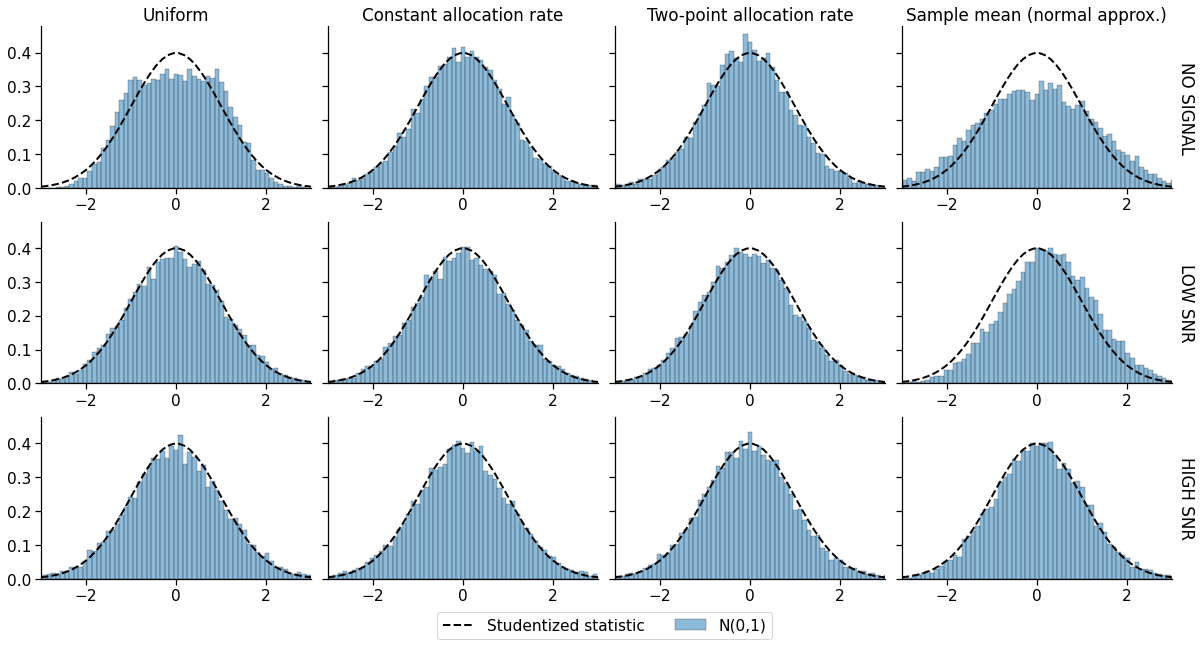

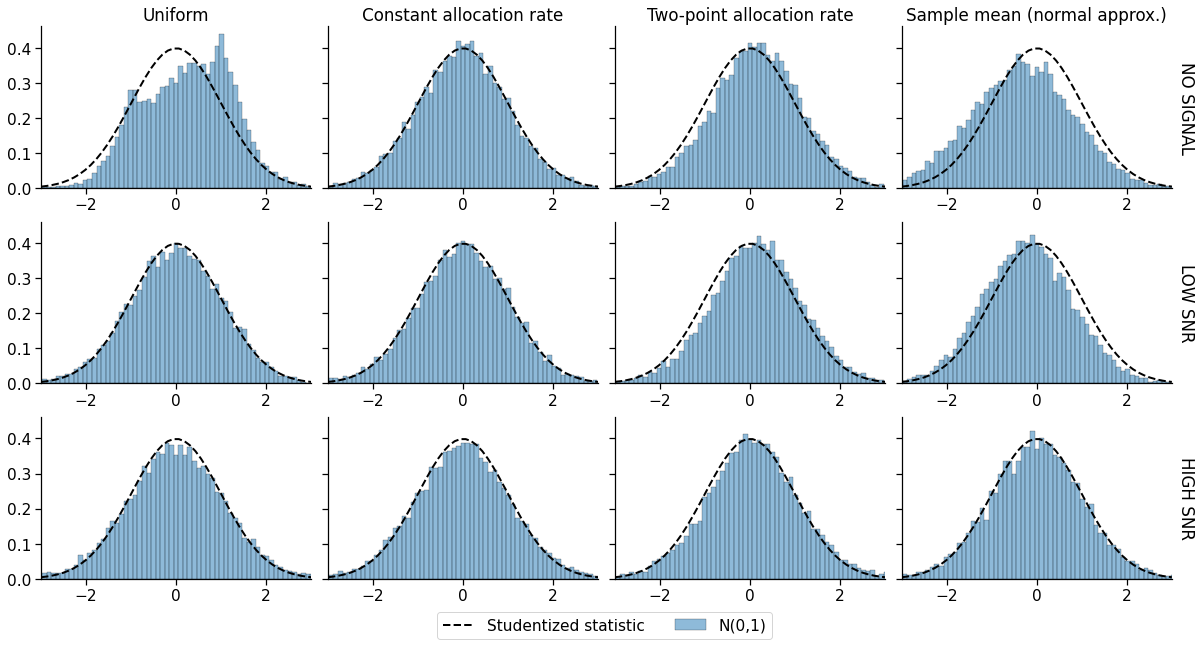

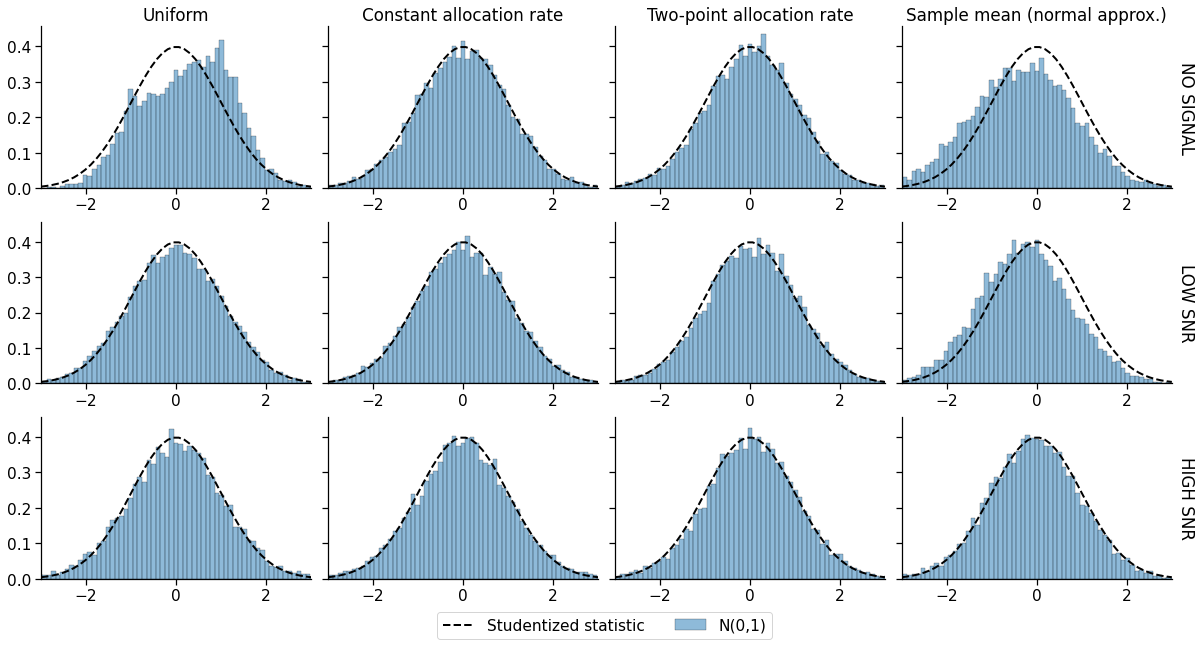

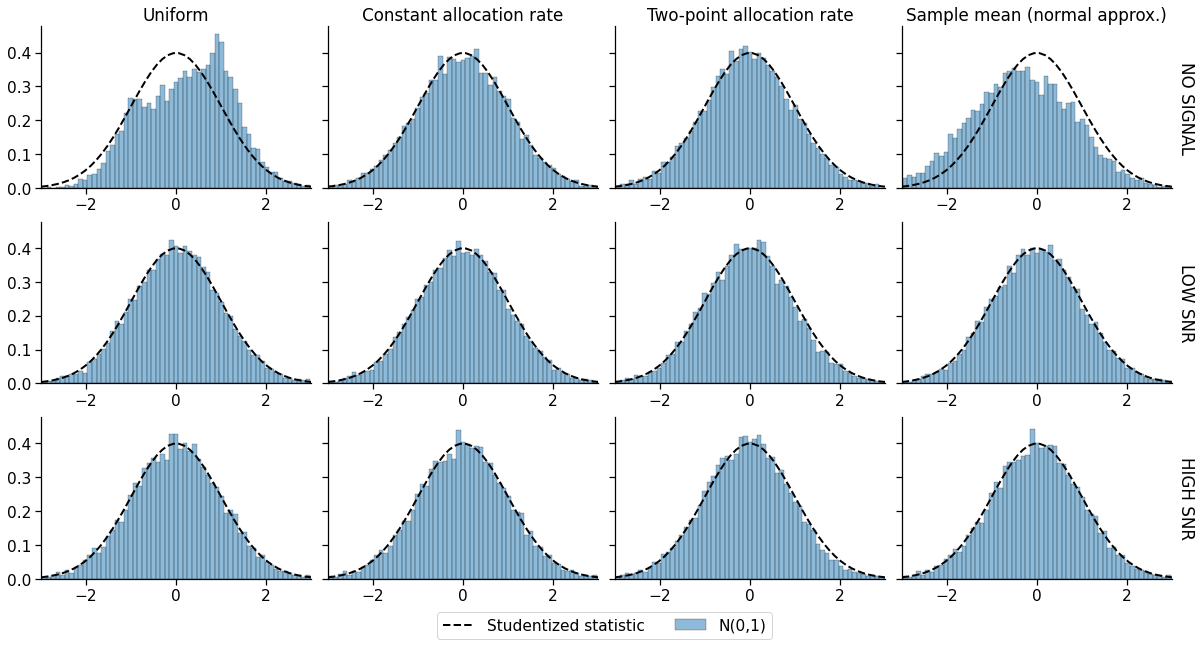

In [60]:
for policy in policies:
    
    display(HTML(f"<h2>Policy: {policy}</h2>"))

    xs = np.linspace(-3, 3)

    g = sns.FacetGrid(col="method",
                      col_order=col_order,
                      row='dgp',
                      row_order=row_order,
                      hue="statistic",
                      hue_order=['t-stat'],
                      legend_out=True,
                      sharex=False,
                      sharey=True,
                      margin_titles=True,
                      aspect=1.4,
                      data=data_hist.query('T == 100_000 and policy == @policy'))

    g = g.map(sns.histplot, "value", alpha=0.5, bins=np.linspace(-5, 5, 100), stat='density')

    # Add histogram of N(0, 1)
    xs = np.linspace(-3, 3)
    for ax in g.axes.flatten():
        ax.plot(xs, norm.pdf(xs), label='N(0,1)', **
                {"color": "black", "linestyle": "--", "linewidth": 2})
        ax.set_xticks([-2, 0, 2])
        ax.set_xlim([-3, 3])

    # Add row and column names
    g.row_names = ['NO SIGNAL', 'LOW SNR', 'HIGH SNR']
    g.col_names = col_names 

    for ax in g.axes.flat:
        plt.setp(ax.texts, text="")
    g.set_titles(row_template="{row_name}", col_template="{col_name}")

    # Add legend
    handles, labels = g._legend_data.values(), g._legend_data.keys()
    g.fig.legend(labels=['Studentized statistic', 'N(0,1)'],
                 loc='center',  ncol=3, bbox_to_anchor=(0.5, 0.03))
    g.set_xlabels("")
    g.set_ylabels("")

    g.fig.tight_layout()
    g.fig.subplots_adjust(bottom=0.1)

    plt.show()

    if isinstance(policy, tuple):
        name = f"histogram_{policy[1]}-{policy[3]}"
    else:
        name = f'histogram_{policy}'
    g.fig.savefig(f'figures/{name}.pdf', bbox_inches='tight')

----

## Comparison to W-decorrelation

In [6]:
hue_order = ['W-decorrelation_15', 'two_point']
palette = sns.color_palette("colorblind")[:len(hue_order)]
col_order = ['highSNR:0', 'highSNR:2', 'nosignal:0']

In [7]:
df_subset = data_arms.query('method == @hue_order')
df_subset['experiment_policy'] = df_subset['dgp'] + ":" + df_subset['policy'].astype(str)

/Users/vitorhadad/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
g = sns.catplot(x="T",
                y="value",
                hue='method',
                hue_order=hue_order,
                palette=palette,
                col="experiment_policy",
                col_order=col_order,
                row="statistic",
                row_order=['mse', 'CI_width', '90% coverage of t-stat'],
                kind="point",
                sharex=True,
                sharey='row',
                legend=False,
                legend_out=True,
                margin_titles=True,
                data=df_subset)


# plot RMSE of good arm high SNR
for i, col in enumerate(col_order): # good arm, bad arm, bad(any) arm
    g.axes[0, i].clear()
    sns.pointplot(x='T',
                  y="value",
                  hue='method',
                  hue_order=hue_order,
                  palette=palette,
                  ax=g.axes[0, i],
                  data=df_subset.query(f"statistic=='mse' & experiment_policy == @col"),
                  estimator=lambda x: np.sqrt(np.mean(x)))
    g.axes[0, i].get_legend().remove()
    g.axes[0, i].set_xlabel("")
    g.axes[0, i].set_ylabel("")


# Add row and column names
g.row_names = ['RMSE', 'Confidence Interval Radius', '90% coverage of t-stat']
g.col_names = ['GOOD ARM: HIGH SIGNAL', 'BAD ARM: HIGH SIGNAL', 'NO SIGNAL']


for ax in g.axes.flat:
    plt.setp(ax.texts, text="")

g.set_titles(row_template="{row_name}", col_template="{col_name}")

# rmse
for ax in g.axes[0, :]:
    ax.axhline(0., color="black", linestyle='--')

# ci radius
for ax in g.axes[1, :]:
    ax.axhline(0., color="black", linestyle='--')

# coverage
for ax in g.axes[2, :]:
    ax.axhline(.9, color="black", linestyle='--')

# Add legend
handles, labels = g._legend_data.values(), g._legend_data.keys()
g.fig.legend(labels=['W-decorrelation', 'Two-point allocation'],
             handles=handles, loc='lower center', ncol=2, bbox_to_anchor=(0.5, 0.0))

g.set_xlabels("Experiment length")
g.set_ylabels("")

g.fig.tight_layout()
g.fig.subplots_adjust(bottom=0.1)

return g.fig